In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


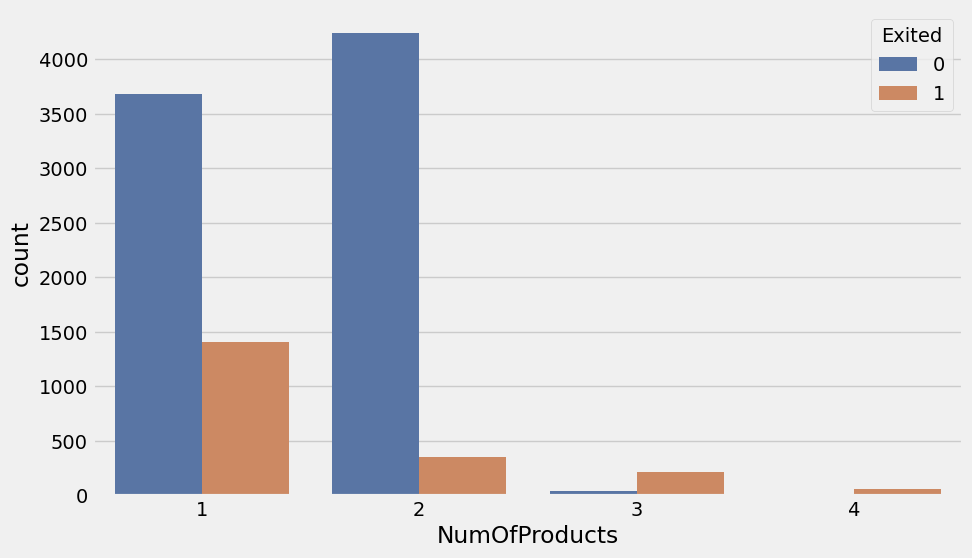

In [6]:
# Create the grouped bar chart
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='NumOfProducts', hue='Exited', palette='deep')
plt.xlabel('NumOfProducts')
plt.show()

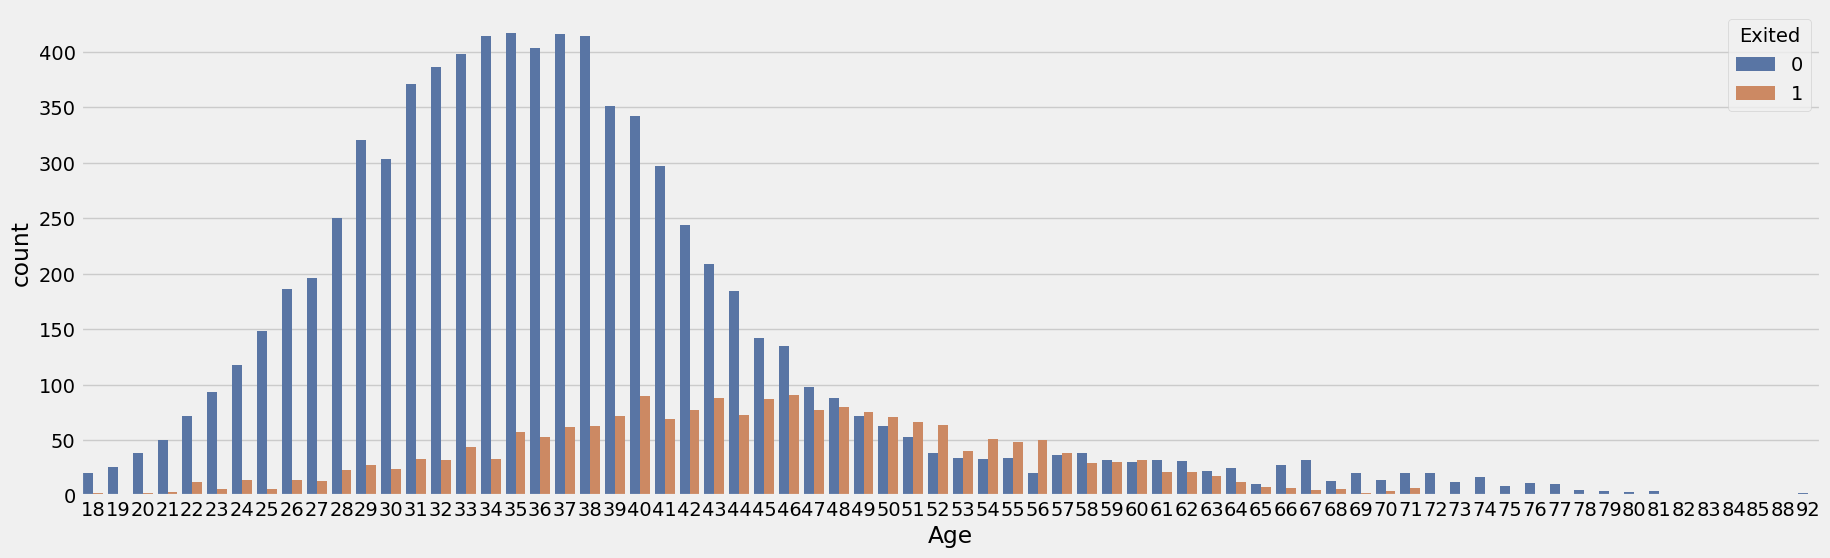

In [7]:
# Create the grouped bar chart
plt.figure(figsize=(20,6))
sns.countplot(data=data, x='Age', hue='Exited', palette='deep')
plt.xlabel('Age')
plt.show()

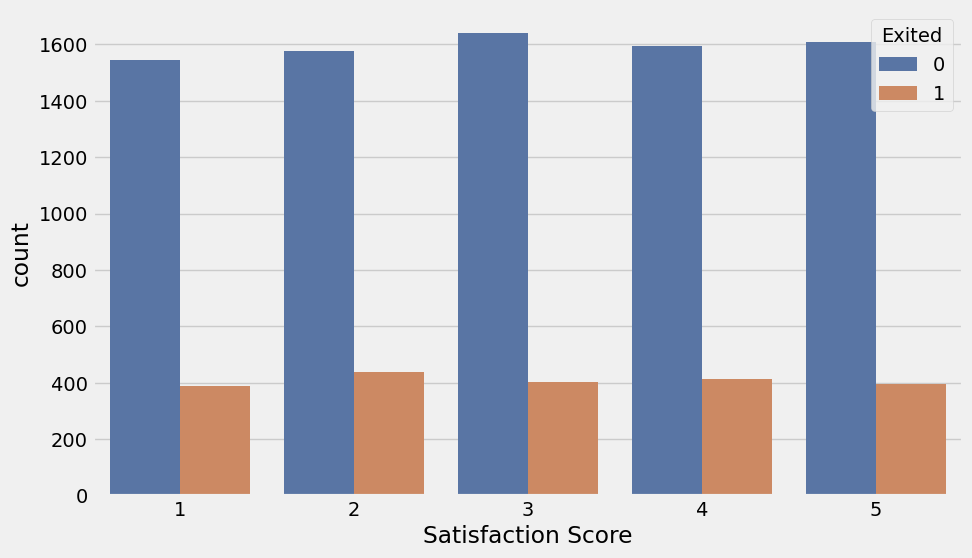

In [8]:
# Create the grouped bar chart
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Satisfaction Score', hue='Exited', palette='deep')
plt.xlabel('Satisfaction Score')
plt.show()

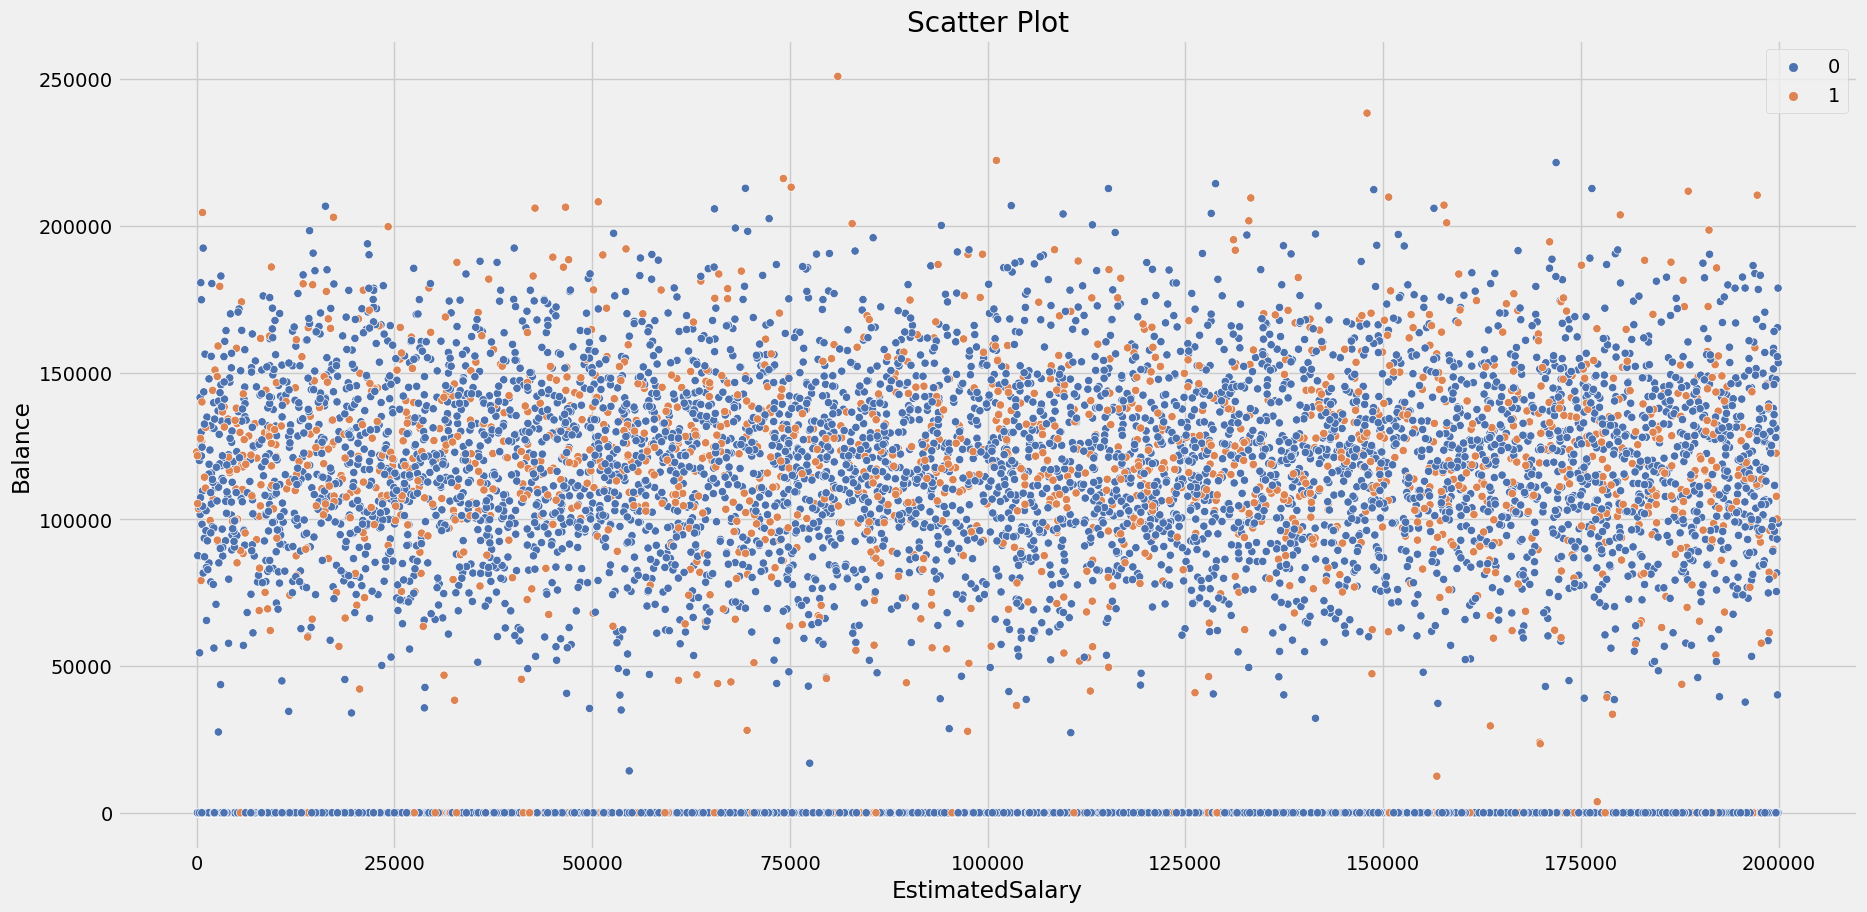

In [9]:
Title = "Scatter Plot"

plt.figure(figsize=(20,10))
pl = sns.scatterplot(data=data, x=data["EstimatedSalary"], y=data["Balance"], hue=data["Exited"], palette='deep')
pl.set_title(Title)
plt.legend()
plt.show()

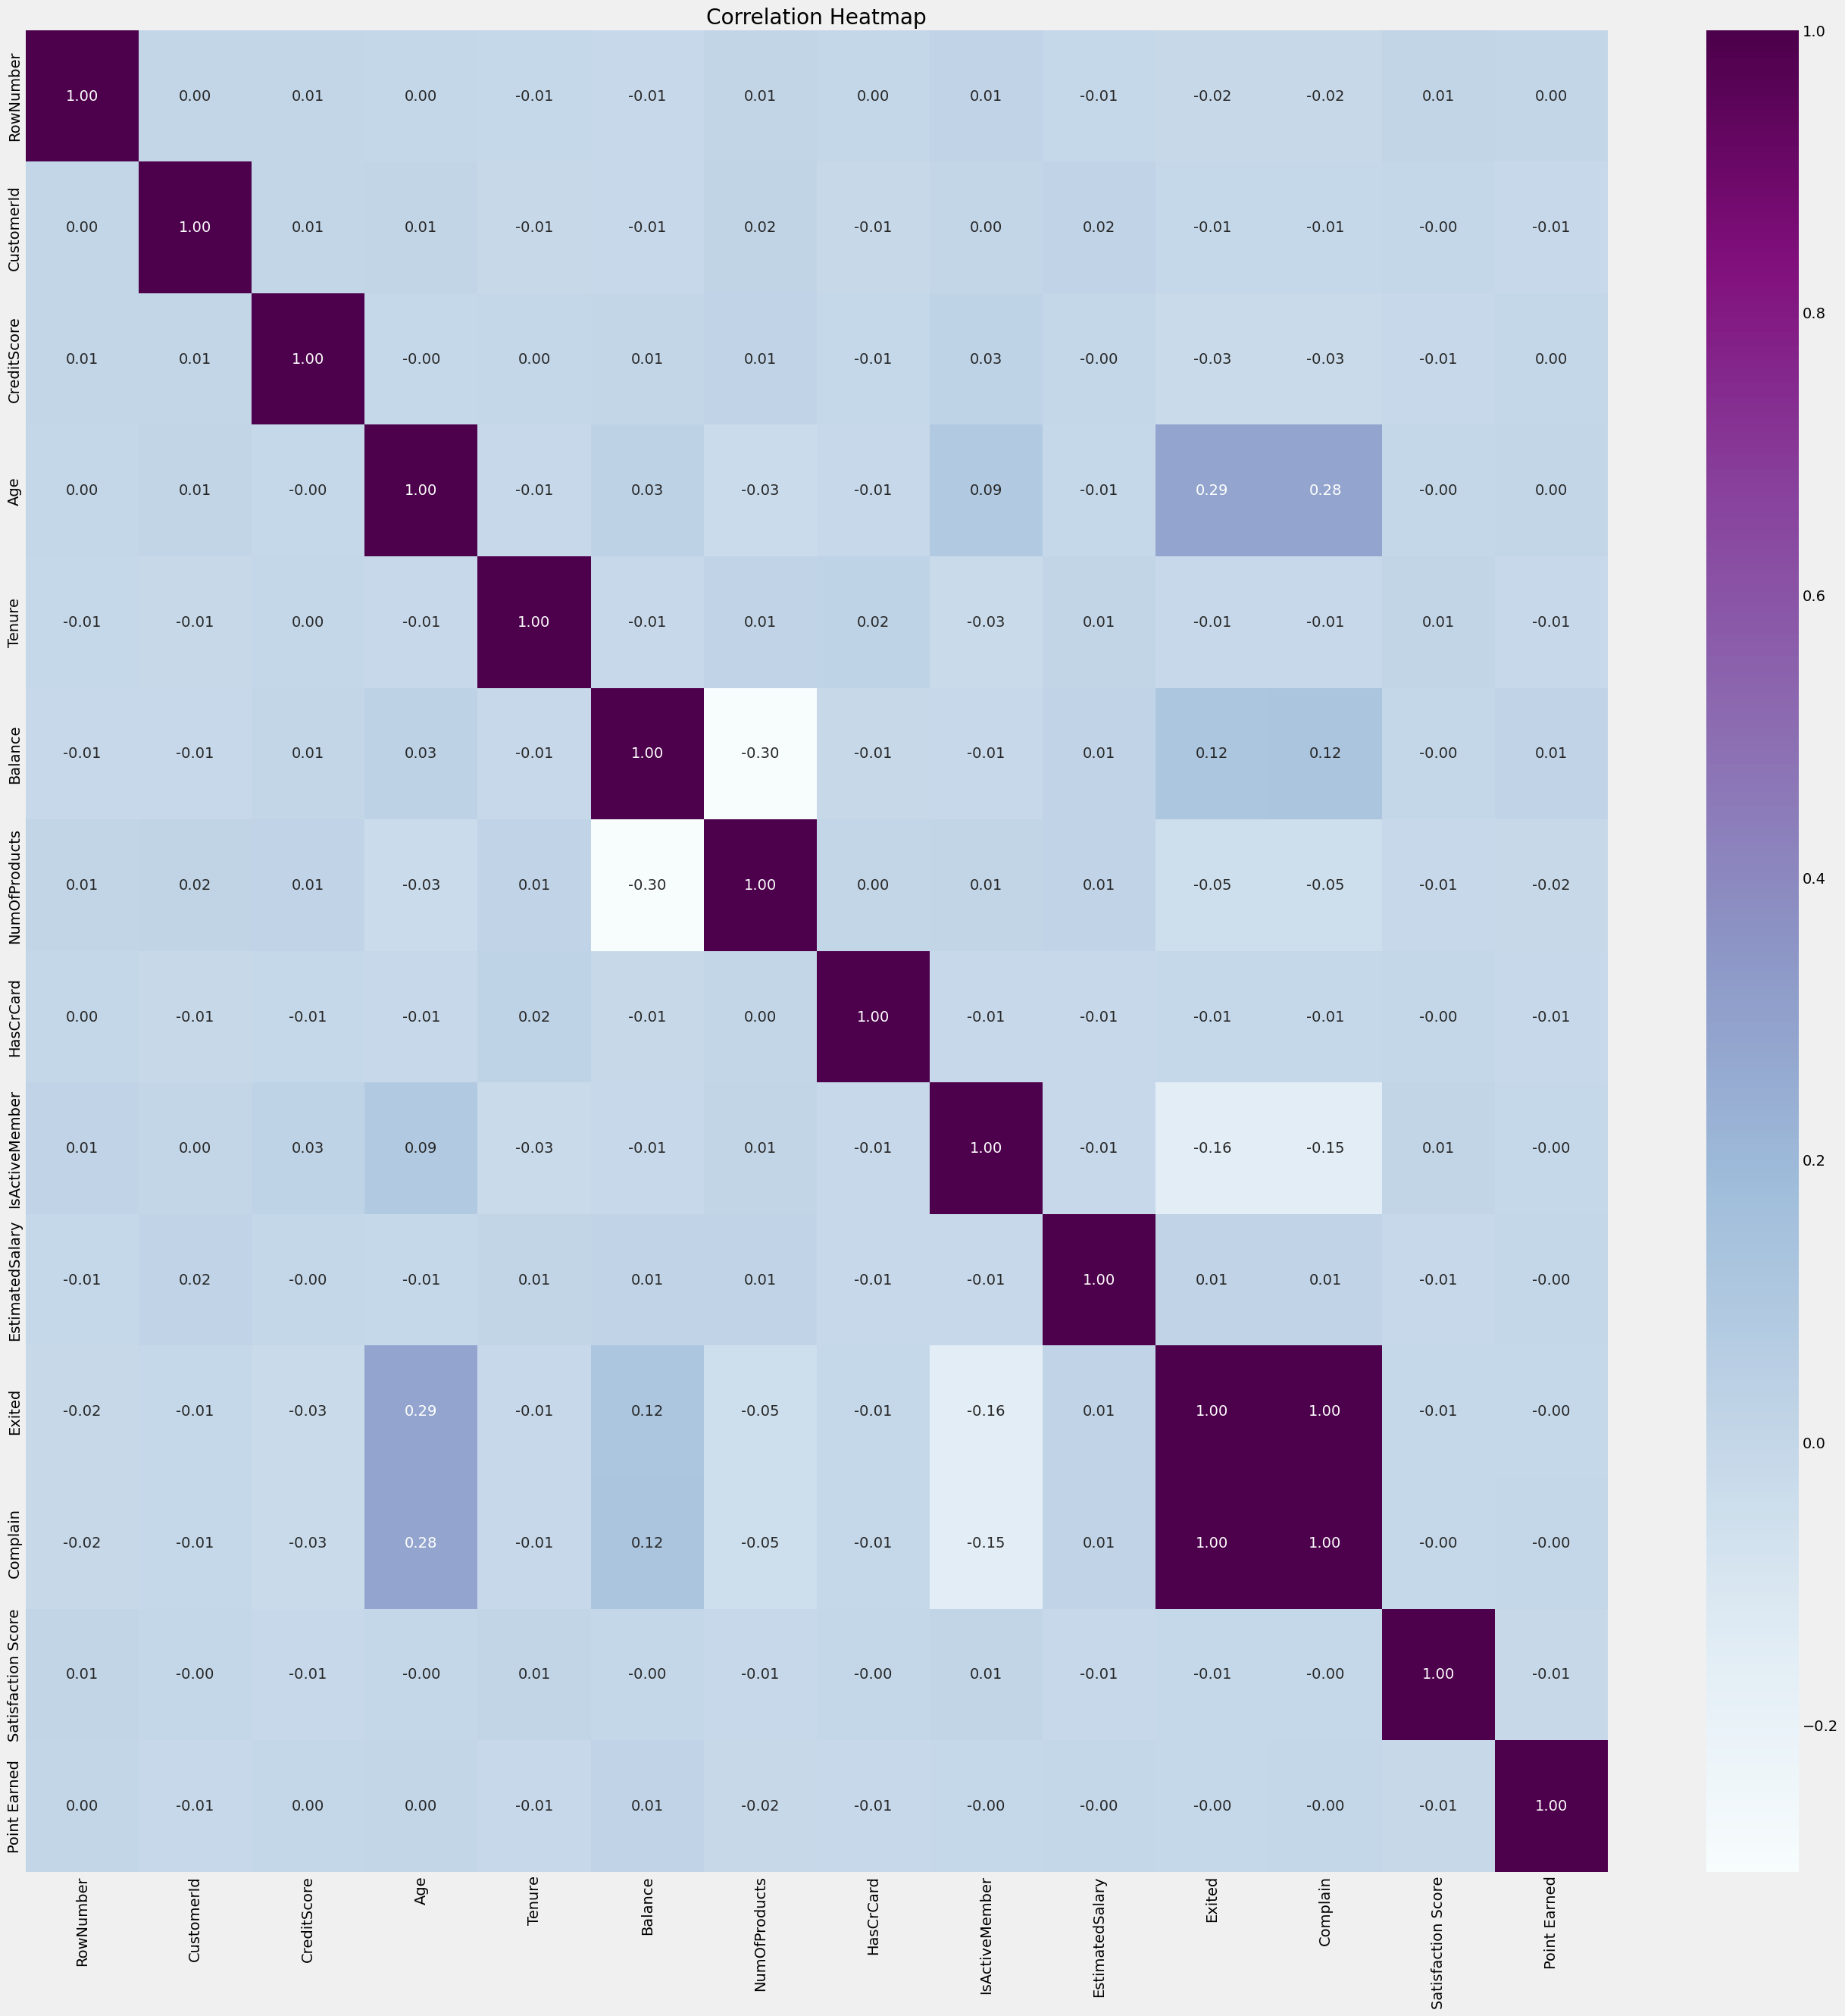

In [10]:
#Creating a Correlation heatmap
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap="BuPu", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
import plotly.express as px

# Calculate churn rate by age and gender
churn_rate_age_gender = data.groupby(['Age', 'Gender'])['Exited'].mean().reset_index()


# Create an interactive scatter plot
fig = px.scatter(data_frame=churn_rate_age_gender, x='Age', y='Exited', color='Gender',
                 title='Churn Rate by Age & Gender')
fig.update_layout(xaxis_title='Age', yaxis_title='Churn Rate')
fig.show()

In [12]:
# Calculate churn rate by credit score and number of products
churn_rate_credit_products = data.groupby(['CreditScore', 'NumOfProducts'])['Exited'].mean().reset_index()

# Create an interactive heatmap
fig = px.density_heatmap(churn_rate_credit_products, x='CreditScore', y='NumOfProducts',
                         z='Exited', title='Churn Rate by Credit Score & No. Of Products')
fig.update_layout(xaxis_title='Credit Score', yaxis_title='Number Of Products')
fig.show()

In [13]:
# Calculate churn rate by credit score and number of products
churn_rate_credit_products = data.groupby(['Tenure', 'Satisfaction Score'])['Exited'].mean().reset_index()

# Create an interactive heatmap
fig = px.density_heatmap(churn_rate_credit_products, x='Tenure', y='Satisfaction Score',
                         z='Exited', title='Churn Rate')
fig.update_layout(xaxis_title='Tenure', yaxis_title='Satisfaction Score')
fig.show()

In [14]:
#Feature Engineer

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [15]:
#Creating a copy
ds = data.copy()

#Feature Engineering
to_drop = ['RowNumber', 'CustomerId','Surname','Geography','Gender','Card Type']
ds = ds.drop(to_drop, axis=1)

In [16]:
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns = ds.columns)
scaled_ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.976555,1.972908,-0.721130,-0.630839
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505931,1.972908,-0.009816,-0.666251
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.976555,1.972908,-0.009816,-1.015942
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505931,-0.506866,1.412812,-1.135457
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505931,-0.506866,1.412812,-0.803472


In [17]:
selected_features = ds.drop(['Exited'], axis=1)
target_variable = ds['Exited']

In [18]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, target_variable, test_size=0.4, random_state=35)

# Train and Evaluate Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print(rf_predictions)

[0 0 0 ... 0 0 0]


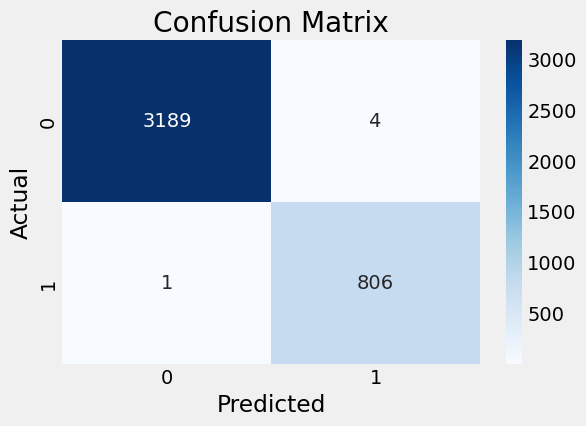

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3193
           1       1.00      1.00      1.00       807

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [19]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, rf_predictions)
print("Classification Report:")
print(report)

In [20]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
# Calculate Precision
precision = precision_score(y_test, rf_predictions)
# Calculate Recall
recall = recall_score(y_test, rf_predictions)
# Calculate F1-score
f1 = f1_score(y_test, rf_predictions)

# Print the results

print("Accuracy score:",rf_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy score: 0.99875
Precision: 0.9950617283950617
Recall: 0.9987608426270136
F1-score: 0.9969078540507113
